# Plots Generator

Generates two plots, one for HiC loops only and one for HiC & long loops. Each has four subgroups, listed below, in which we compare control and KD cells:
- Negative control, loops without CREs,
- Negative control, loops without enhancers,
- CUX1 bound enhancers,
- CUX1 & SMARCA4 co-bound enhancers.

## Library imports

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

## HiC Loops

Import the count matrices from `computeMatrix`.

In [34]:
hic_nc_CREs = pd.read_csv('cux1_short_loops/matrix_loops_without_CREs.tab', header=0, sep='\t')
hic_nc_enhancers = pd.read_csv('cux1_short_loops/matrix_loops_without_enhancers.tab', header=0, sep='\t')
hic_enhancers = pd.read_csv('cux1_short_loops/matrix_enhancers.tab', header=0, sep='\t')
hic_smaca4_enhancers = pd.read_csv('cux1_smaca4_short_loops/matrix_enhancers.tab', header=0, sep='\t')

Create a data frame from each matrix that distinguished CTRL and KD values. We size match the negative control.

In [35]:
# Filters only CTRL values from the matrix
def filterCTRL(matrix):
	return matrix.filter(regex='CTRL|WT').sum(axis=1)

# Filters only KD values from the matrix
def filterKD(matrix):
	return matrix.filter(regex='KD').sum(axis=1)

In [36]:
hic_enhancers_plot_pre = pd.DataFrame({'CTRL': filterCTRL(hic_enhancers),'KD': filterKD(hic_enhancers)})
hic_smaca4_enhancers_plot_pre = pd.DataFrame({'CTRL': filterCTRL(hic_smaca4_enhancers),'KD': filterKD(hic_smaca4_enhancers)})
hic_nc_CREs_plot_pre = pd.DataFrame({'CTRL': filterCTRL(hic_nc_CREs),'KD': filterKD(hic_nc_CREs)})
hic_nc_enhancers_plot_pre = pd.DataFrame({'CTRL': filterCTRL(hic_nc_enhancers),'KD': filterKD(hic_nc_enhancers)})

In [37]:
hic_shared_size = min([hic_enhancers_plot_pre.shape[0], hic_smaca4_enhancers_plot_pre.shape[0], hic_nc_CREs_plot_pre.shape[0], hic_nc_enhancers_plot_pre.shape[0]])
hic_enhancers_plot = hic_enhancers_plot_pre.sample(n=hic_shared_size)
hic_smaca4_enhancers_plot = hic_smaca4_enhancers_plot_pre.sample(n=hic_shared_size)
hic_nc_CREs_plot = hic_nc_CREs_plot_pre.sample(n=hic_shared_size)
hic_nc_enhancers_plot = hic_nc_enhancers_plot_pre.sample(n=hic_shared_size)

(hic_shared_size, [hic_enhancers_plot_pre.shape[0], hic_smaca4_enhancers_plot_pre.shape[0], hic_nc_CREs_plot_pre.shape[0], hic_nc_enhancers_plot_pre.shape[0]])

(703, [1288, 703, 4736, 4745])

Perform statistical tests.

In [38]:
scipy.stats.ttest_ind(hic_enhancers_plot['CTRL'], hic_enhancers_plot['KD'])

Ttest_indResult(statistic=3.133088743038873, pvalue=0.0017655398260284796)

In [39]:
scipy.stats.ttest_ind(hic_smaca4_enhancers_plot['CTRL'], hic_smaca4_enhancers_plot['KD'])

Ttest_indResult(statistic=3.081860289656625, pvalue=0.002097136149685753)

In [40]:
scipy.stats.ttest_ind(hic_nc_CREs_plot['CTRL'], hic_nc_CREs_plot['KD'])

Ttest_indResult(statistic=1.15808351076594, pvalue=0.24702691557052453)

In [41]:
scipy.stats.ttest_ind(hic_nc_enhancers_plot['CTRL'], hic_nc_enhancers_plot['KD'])

Ttest_indResult(statistic=0.8510182577817323, pvalue=0.39490432632645944)

In [42]:
# 3 vs 1
scipy.stats.ttest_ind(hic_enhancers_plot['CTRL'], hic_nc_CREs_plot['CTRL'])

Ttest_indResult(statistic=12.276556386444438, pvalue=5.5613546587148944e-33)

In [43]:
# 3 vs 2
scipy.stats.ttest_ind(hic_enhancers_plot['CTRL'], hic_nc_enhancers_plot['CTRL'])

Ttest_indResult(statistic=10.983806966409322, pvalue=5.532769857282561e-27)

In [44]:
# 4 vs 1
scipy.stats.ttest_ind(hic_smaca4_enhancers_plot['CTRL'], hic_nc_CREs_plot['CTRL'])

Ttest_indResult(statistic=11.665913646429917, pvalue=4.4212951728812e-30)

In [45]:
# 4 vs 2
scipy.stats.ttest_ind(hic_smaca4_enhancers_plot['CTRL'], hic_nc_enhancers_plot['CTRL'])

Ttest_indResult(statistic=10.492729242955418, pvalue=7.537947758609907e-25)

Generate the plot.

In [46]:
hic_enhancers_plot['sample']='Enhancers'
hic_smaca4_enhancers_plot['sample']='SMACA4 Enhancers'
hic_nc_CREs_plot['sample']='Neg ctrl CREs'
hic_nc_enhancers_plot['sample']='Neg ctrl enhancers'

In [47]:
hic_enhancers_plot = pd.melt(hic_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
hic_smaca4_enhancers_plot = pd.melt(hic_smaca4_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
hic_nc_CREs_plot = pd.melt(hic_nc_CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
hic_nc_enhancers_plot = pd.melt(hic_nc_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")

In [48]:
hic_final_plot = hic_nc_CREs_plot.append(hic_nc_enhancers_plot)
hic_final_plot = hic_final_plot.append(hic_enhancers_plot)
hic_final_plot = hic_final_plot.append(hic_smaca4_enhancers_plot)
hic_final_plot['log2_RPKM'] = np.log2(hic_final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


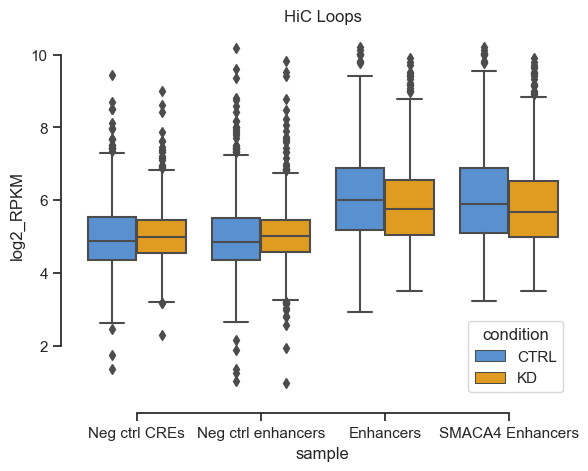

In [49]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(
	x="sample", 
	y="log2_RPKM",
	hue="condition",
	palette=my_pal,
	data=hic_final_plot
).set_title("HiC Loops")
sns.despine(offset=10, trim=True)

## HiC & Long Loops

Import the count matrices from `computeMatrix`.

In [50]:
long_nc_CREs = pd.read_csv('cux1_short_long_loops/matrix_loops_without_CREs.tab', header=0, sep='\t')
long_nc_enhancers = pd.read_csv('cux1_short_long_loops/matrix_loops_without_enhancers.tab', header=0, sep='\t')
long_enhancers = pd.read_csv('cux1_short_long_loops/matrix_enhancers.tab', header=0, sep='\t')
long_smaca4_enhancers = pd.read_csv('cux1_smaca4_short_long_loops/matrix_enhancers.tab', header=0, sep='\t')

Create a data frame from each matrix that distinguished CTRL and KD values. We size match the negative control.

In [51]:
long_enhancers_plot_pre = pd.DataFrame({'CTRL': filterCTRL(long_enhancers),'KD': filterKD(long_enhancers)})
long_smaca4_enhancers_plot_pre = pd.DataFrame({'CTRL': filterCTRL(long_smaca4_enhancers),'KD': filterKD(long_smaca4_enhancers)})
long_nc_CREs_plot_pre = pd.DataFrame({'CTRL': filterCTRL(long_nc_CREs),'KD': filterKD(long_nc_CREs)})
long_nc_enhancers_plot_pre = pd.DataFrame({'CTRL': filterCTRL(long_nc_enhancers),'KD': filterKD(long_nc_enhancers)})

In [52]:
long_shared_size = min([long_enhancers_plot_pre.shape[0], long_smaca4_enhancers_plot_pre.shape[0], long_nc_CREs_plot_pre.shape[0], long_nc_enhancers_plot_pre.shape[0]])
long_enhancers_plot = long_enhancers_plot_pre.sample(n=long_shared_size)
long_smaca4_enhancers_plot = long_smaca4_enhancers_plot_pre.sample(n=long_shared_size)
long_nc_CREs_plot = long_nc_CREs_plot_pre.sample(n=long_shared_size)
long_nc_enhancers_plot = long_nc_enhancers_plot_pre.sample(n=long_shared_size)

(long_shared_size, [long_enhancers_plot_pre.shape[0], long_smaca4_enhancers_plot_pre.shape[0], long_nc_CREs_plot_pre.shape[0], long_nc_enhancers_plot_pre.shape[0]])

(1514, [2112, 1514, 5553, 5580])

Perform statistical tests.

In [53]:
scipy.stats.ttest_ind(long_enhancers_plot['CTRL'], long_enhancers_plot['KD'])

Ttest_indResult(statistic=4.372736463851025, pvalue=1.2683702847577868e-05)

In [54]:
scipy.stats.ttest_ind(long_smaca4_enhancers_plot['CTRL'], long_smaca4_enhancers_plot['KD'])

Ttest_indResult(statistic=3.8096799239046404, pvalue=0.0001419134171466104)

In [55]:
scipy.stats.ttest_ind(long_nc_CREs_plot['CTRL'], long_nc_CREs_plot['KD'])

Ttest_indResult(statistic=1.389021080501717, pvalue=0.16492855172899384)

In [56]:
scipy.stats.ttest_ind(long_nc_enhancers_plot['CTRL'], long_nc_enhancers_plot['KD'])

Ttest_indResult(statistic=1.3499459607046083, pvalue=0.17713428543176213)

In [57]:
# 3 vs 1
scipy.stats.ttest_ind(long_enhancers_plot['CTRL'], long_nc_CREs_plot['CTRL'])

Ttest_indResult(statistic=9.895308844668257, pvalue=9.624873814304674e-23)

In [58]:
# 3 vs 2
scipy.stats.ttest_ind(long_enhancers_plot['CTRL'], long_nc_enhancers_plot['CTRL'])

Ttest_indResult(statistic=10.737236535999221, pvalue=2.0232084597664834e-26)

In [59]:
# 4 vs 1
scipy.stats.ttest_ind(long_smaca4_enhancers_plot['CTRL'], long_nc_CREs_plot['CTRL'])

Ttest_indResult(statistic=8.344208719682818, pvalue=1.0757111490236868e-16)

In [60]:
# 4 vs 2
scipy.stats.ttest_ind(long_smaca4_enhancers_plot['CTRL'], long_nc_enhancers_plot['CTRL'])

Ttest_indResult(statistic=9.14495183515792, pvalue=1.0665006007331843e-19)

Generate the plot.

In [61]:
long_enhancers_plot['sample']='Enhancers'
long_smaca4_enhancers_plot['sample']='SMACA4 Enhancers'
long_nc_CREs_plot['sample']='Neg ctrl CREs'
long_nc_enhancers_plot['sample']='Neg ctrl enhancers'

In [62]:
long_enhancers_plot = pd.melt(long_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
long_smaca4_enhancers_plot = pd.melt(long_smaca4_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
long_nc_CREs_plot = pd.melt(long_nc_CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
long_nc_enhancers_plot = pd.melt(long_nc_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")

In [63]:
long_final_plot = long_nc_CREs_plot.append(long_nc_enhancers_plot)
long_final_plot = long_final_plot.append(long_enhancers_plot)
long_final_plot = long_final_plot.append(long_smaca4_enhancers_plot)
long_final_plot['log2_RPKM'] = np.log2(long_final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


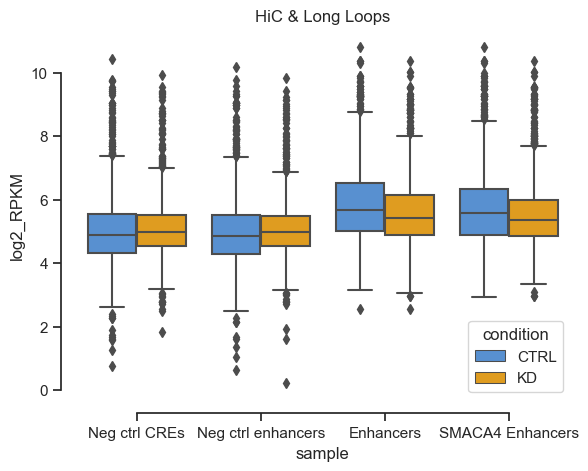

In [64]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(
	x="sample", 
	y="log2_RPKM",
	hue="condition",
	palette=my_pal,
	data=long_final_plot
).set_title("HiC & Long Loops")
sns.despine(offset=10, trim=True)